In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
column_names = ['id', 'diagnosis']
for i in range(30):  
    column_names.append(f'feature_{i}')

df = pd.read_csv('data.csv', header=None, names=column_names)
df = df.drop('id', axis=1)
df.head()

,diagnosis,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
print(df['diagnosis'].value_counts(normalize=True))

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


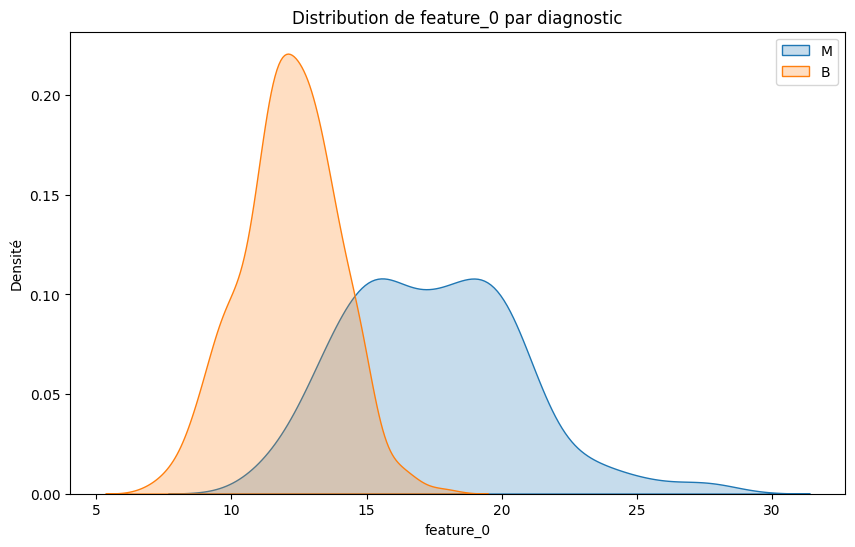

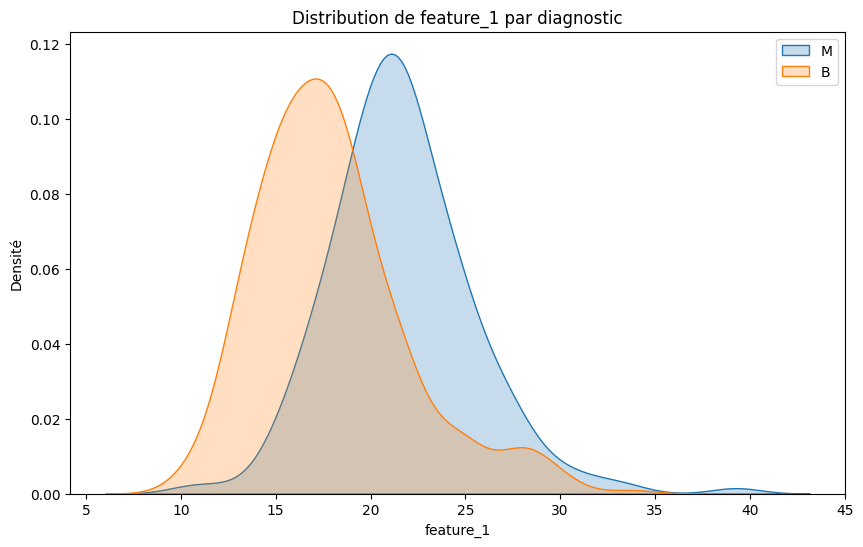

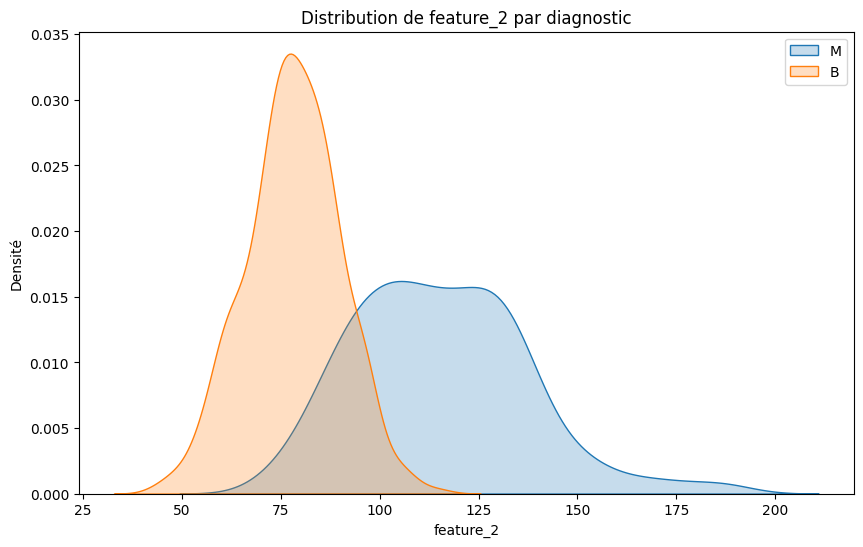

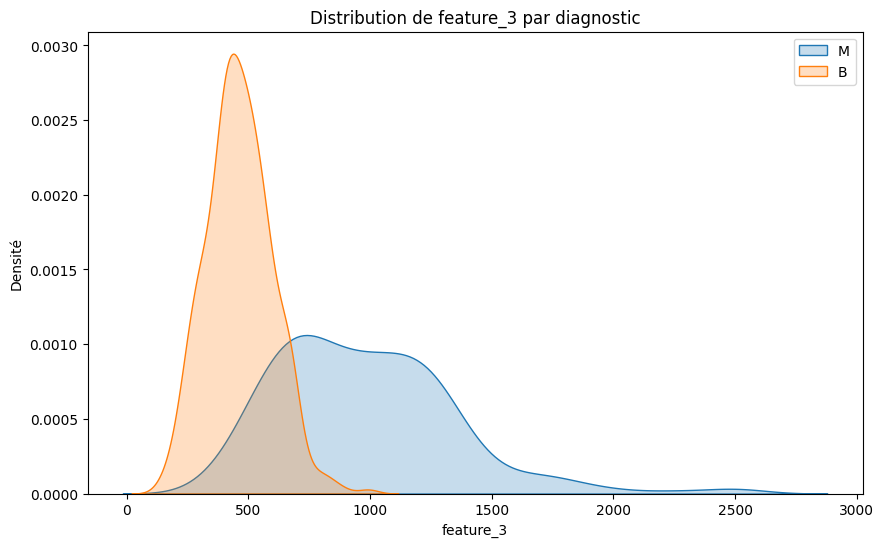

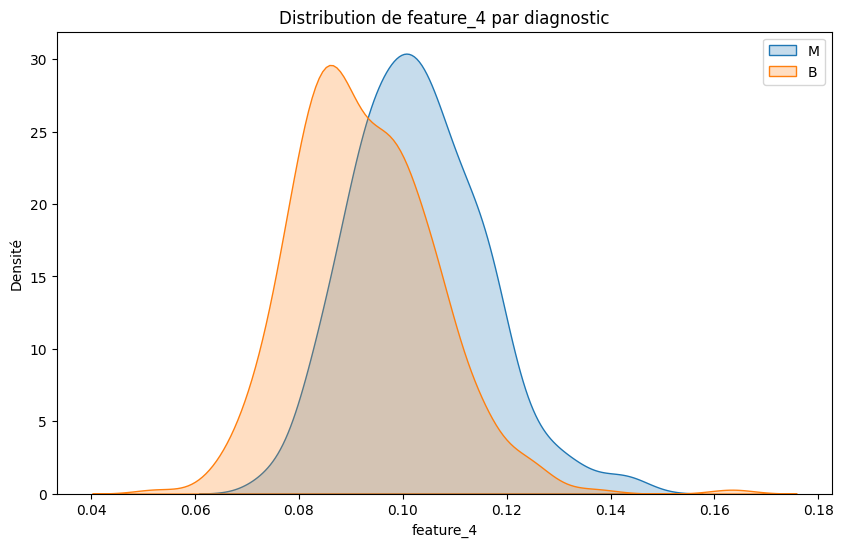

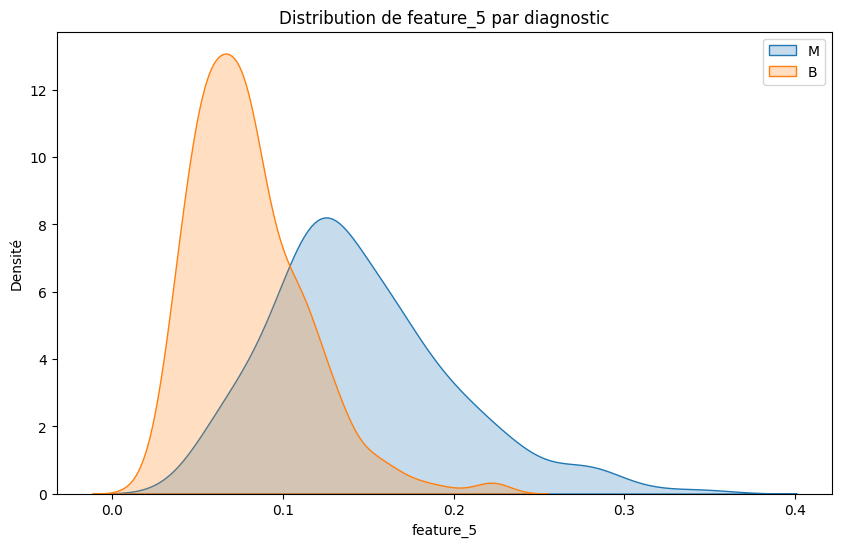

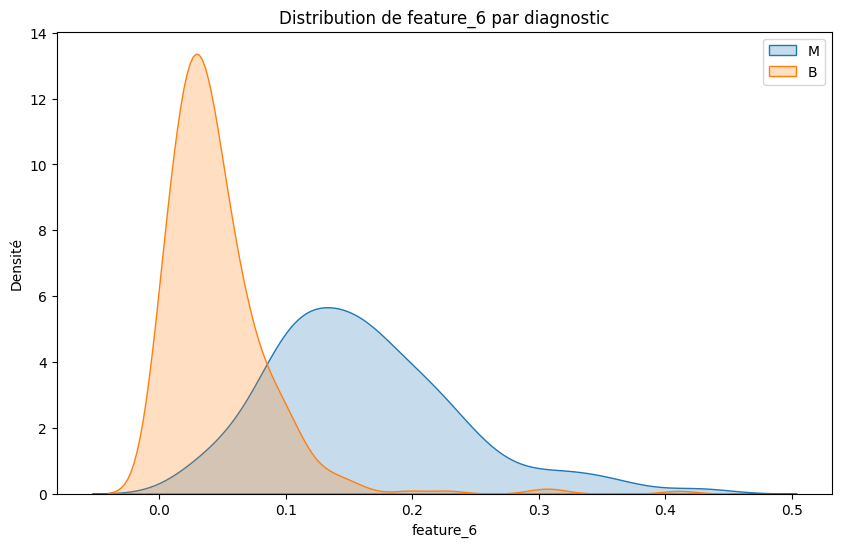

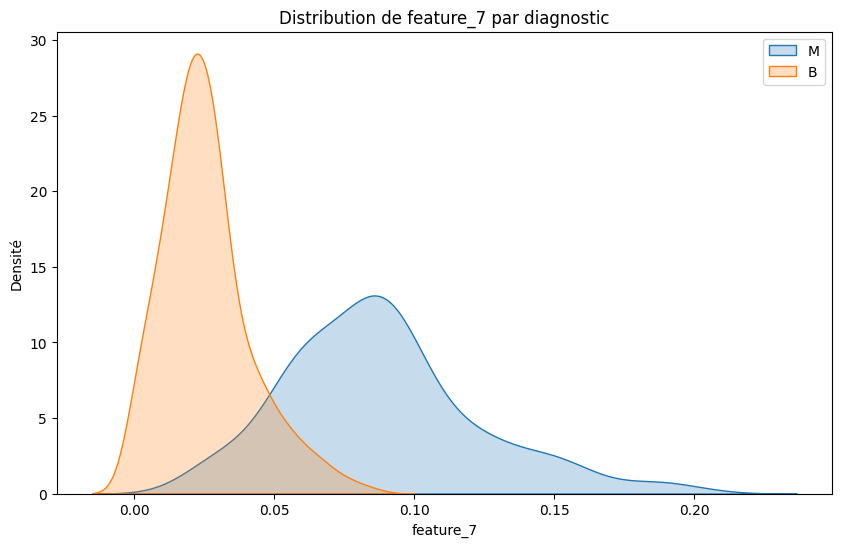

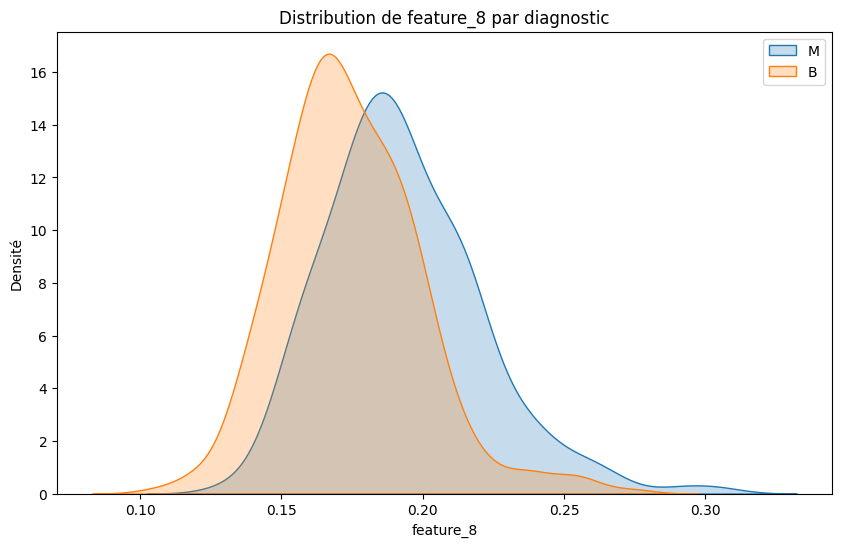

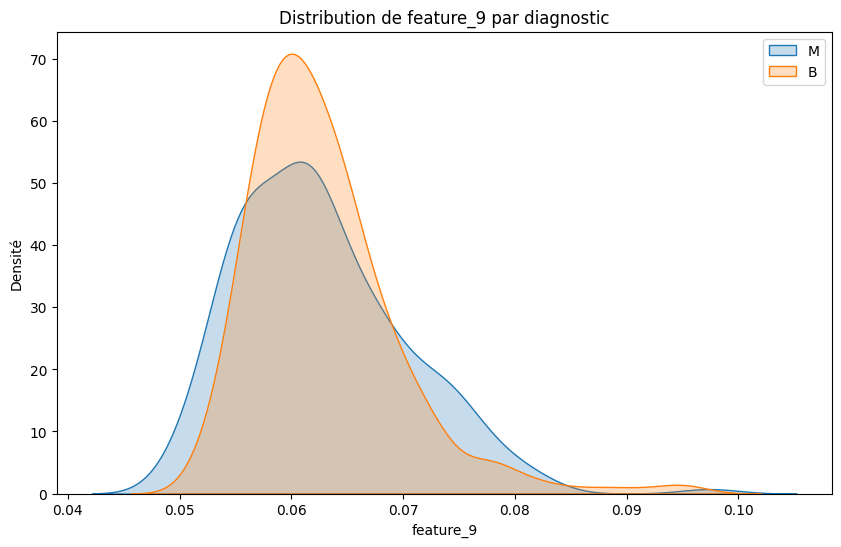

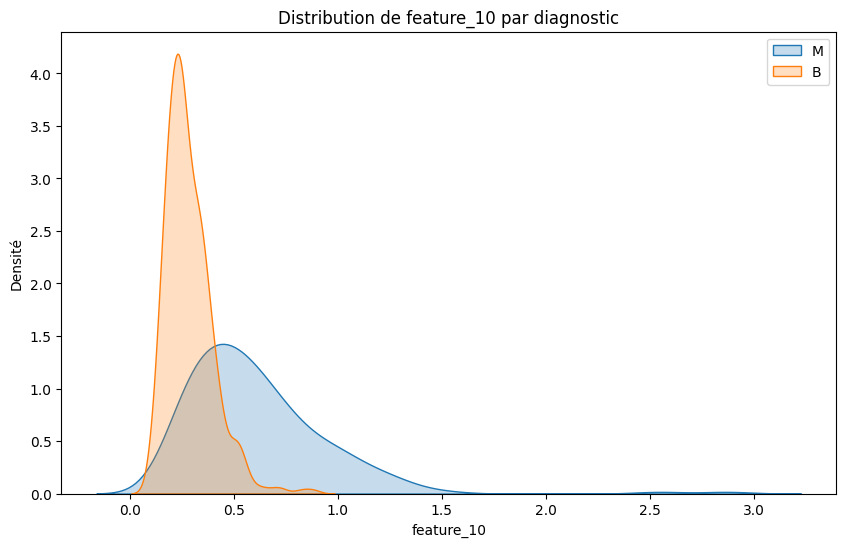

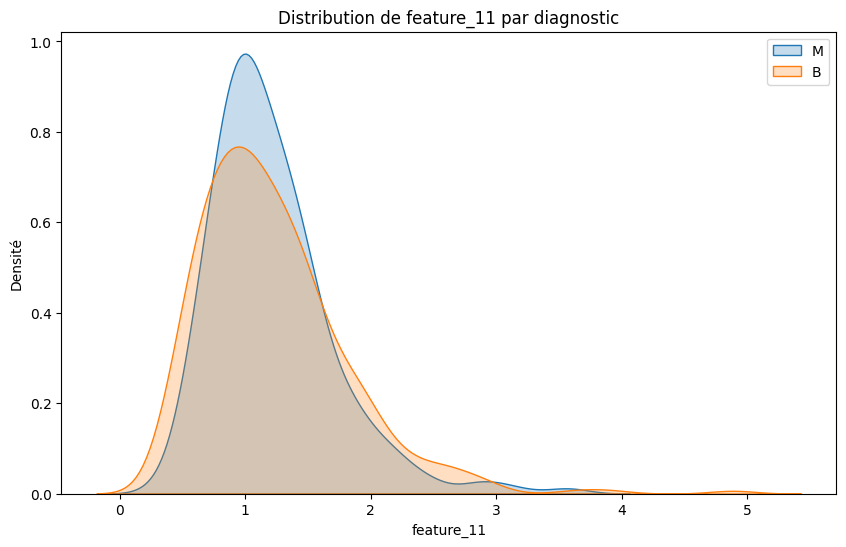

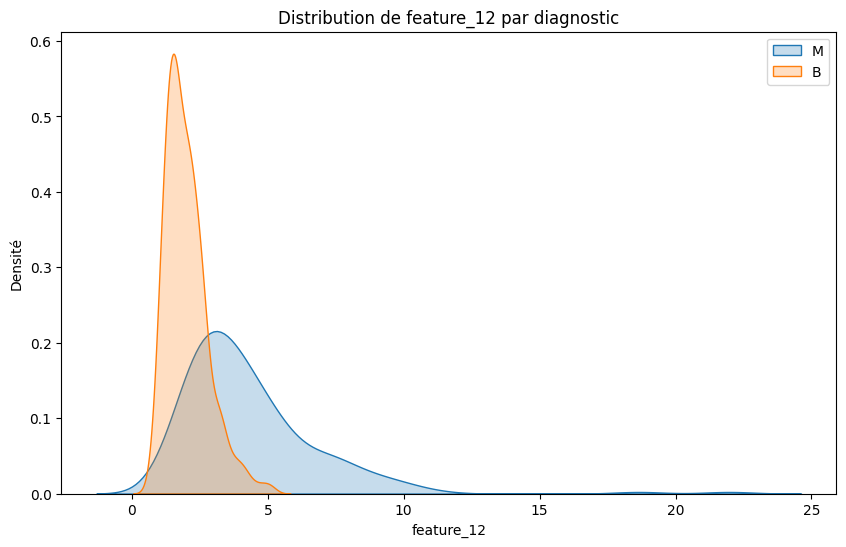

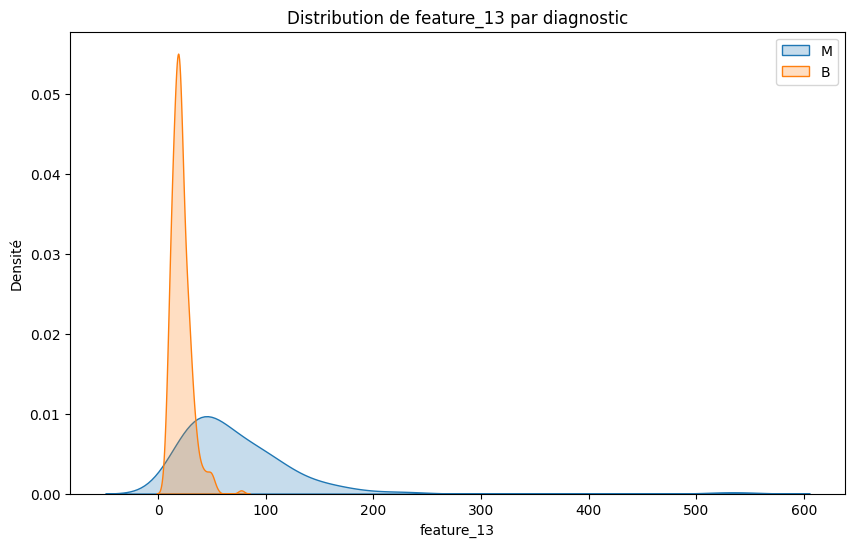

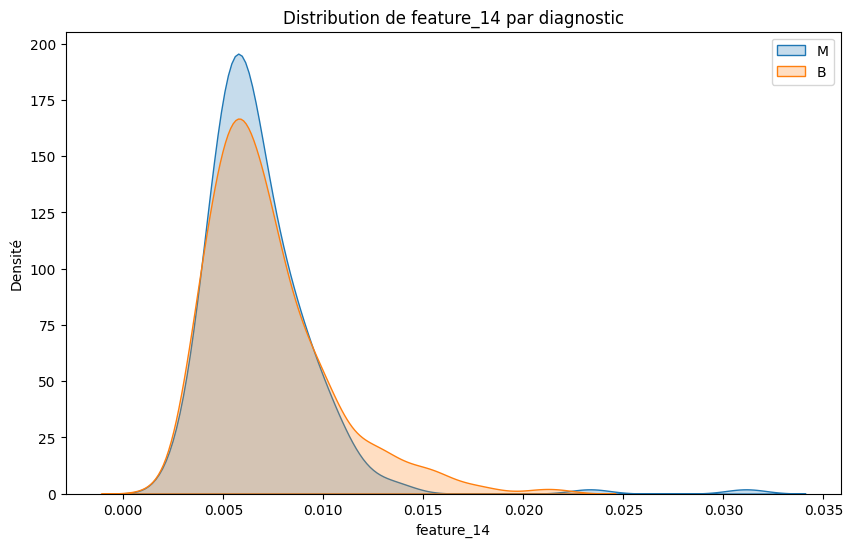

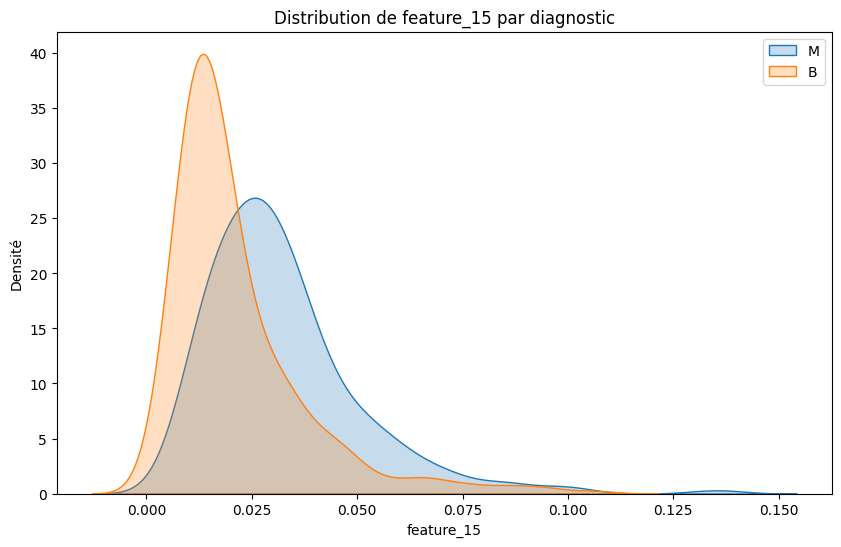

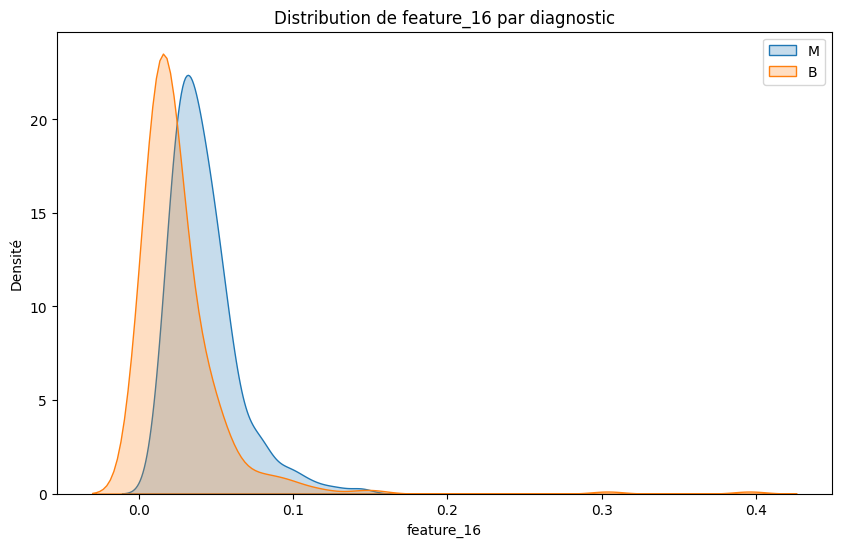

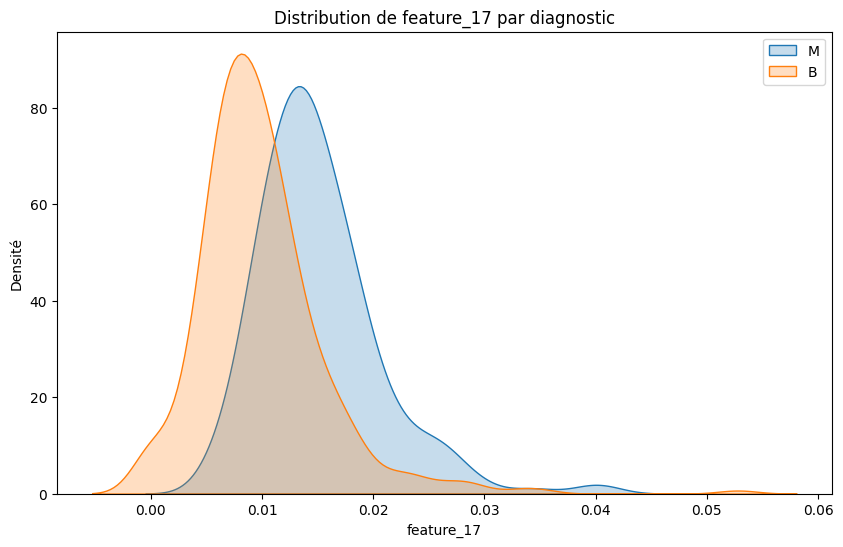

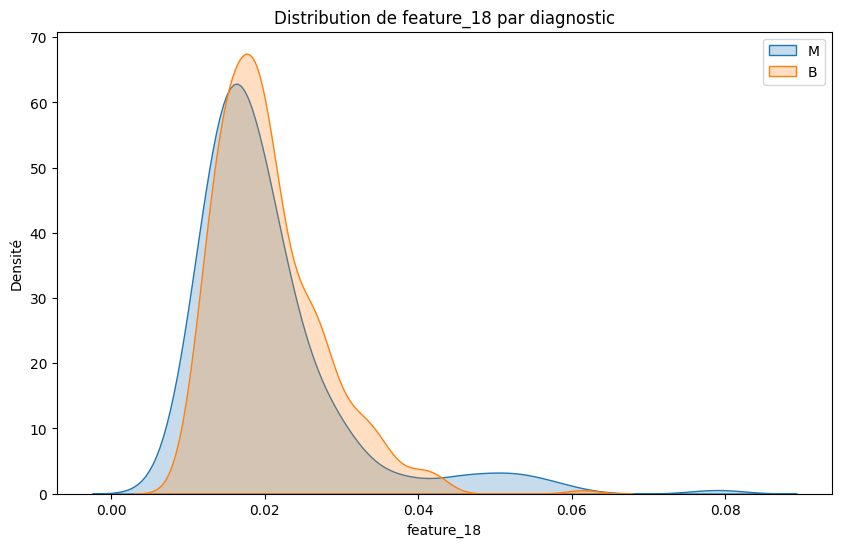

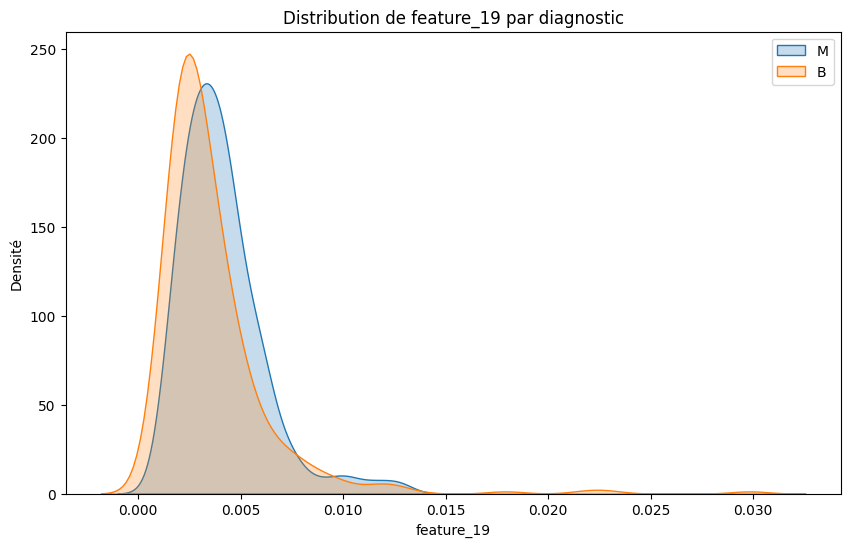

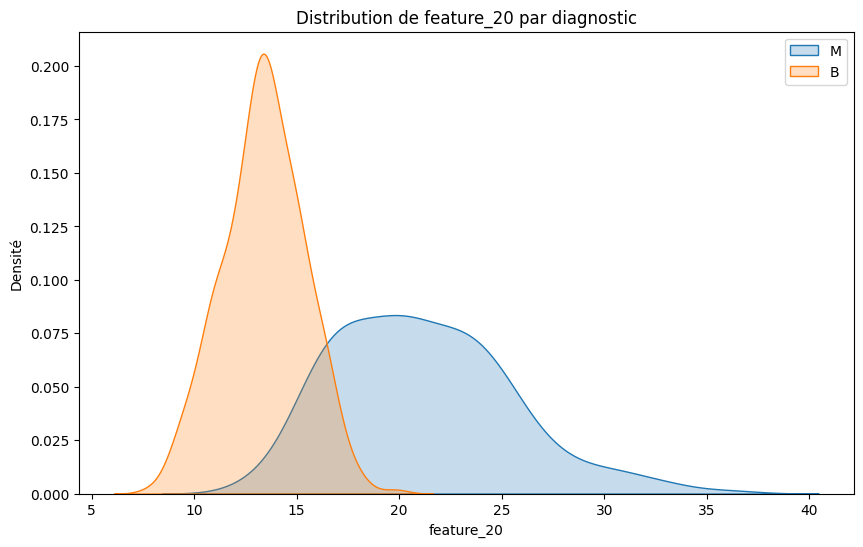

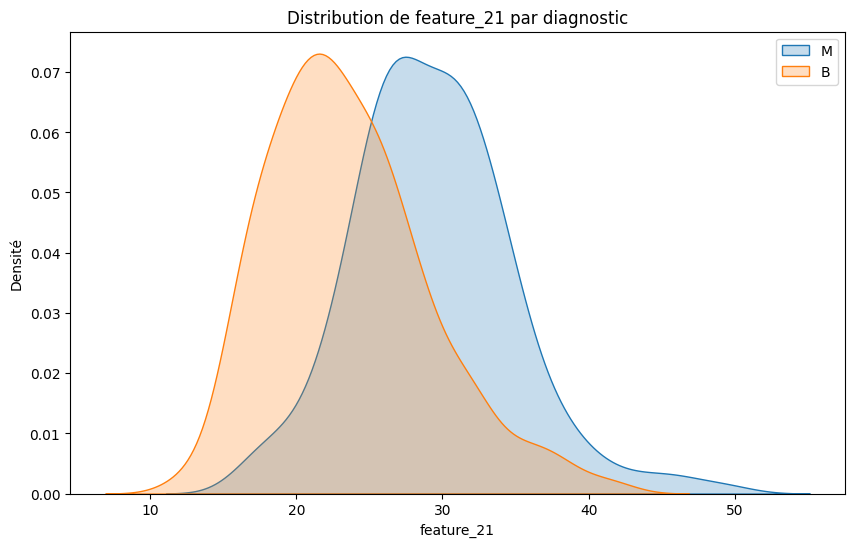

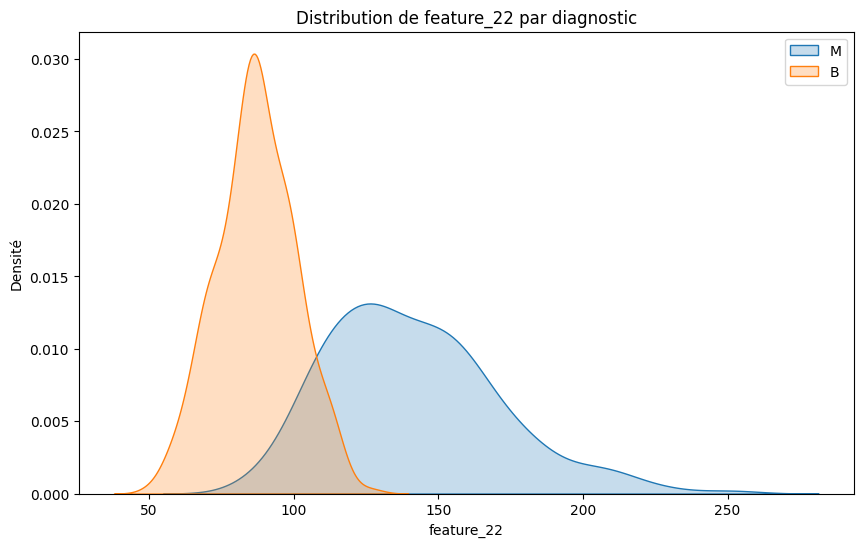

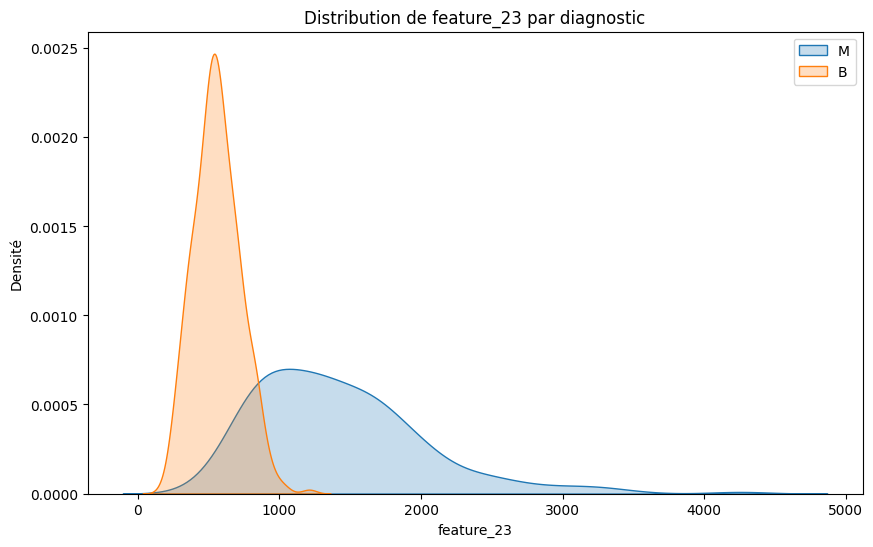

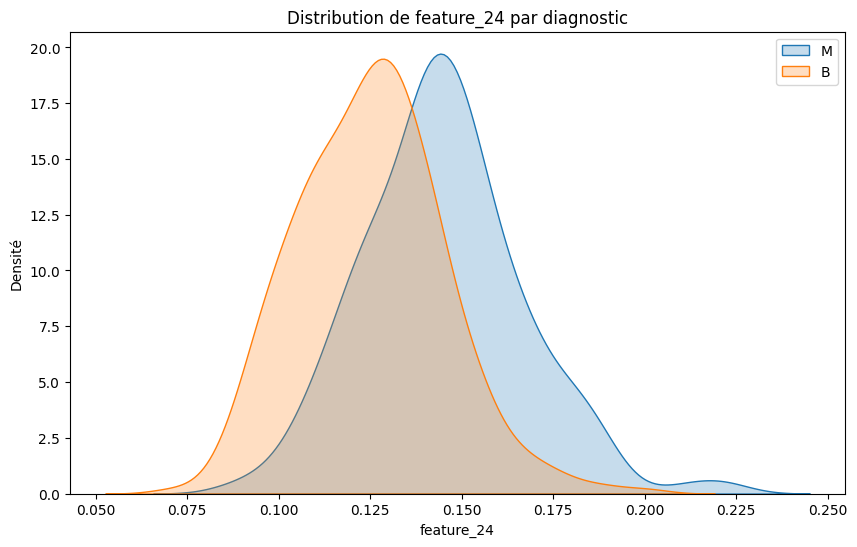

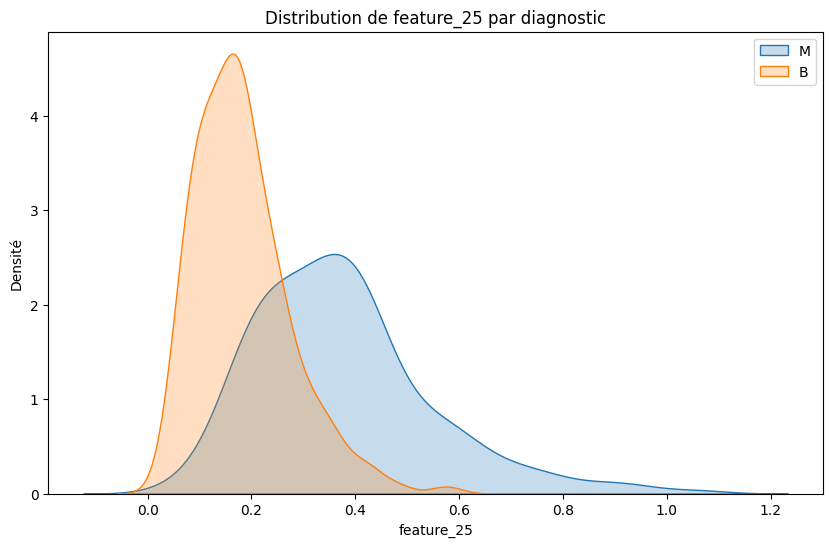

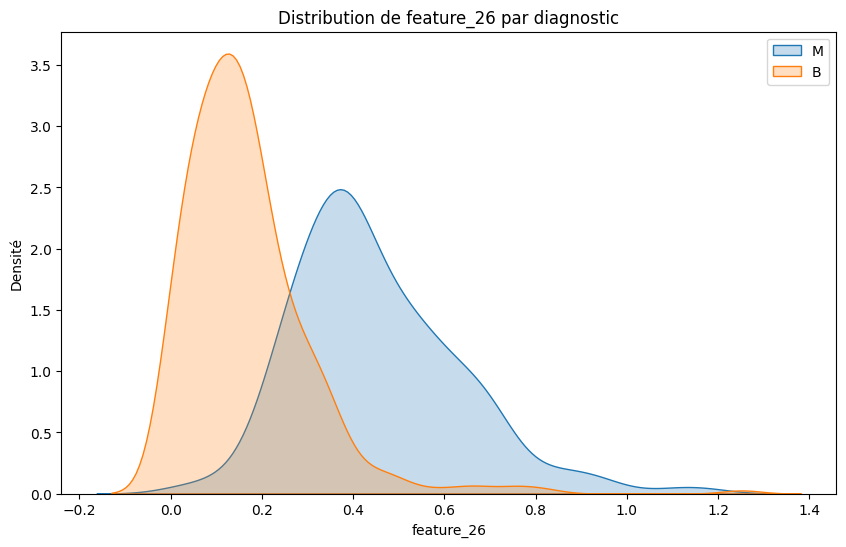

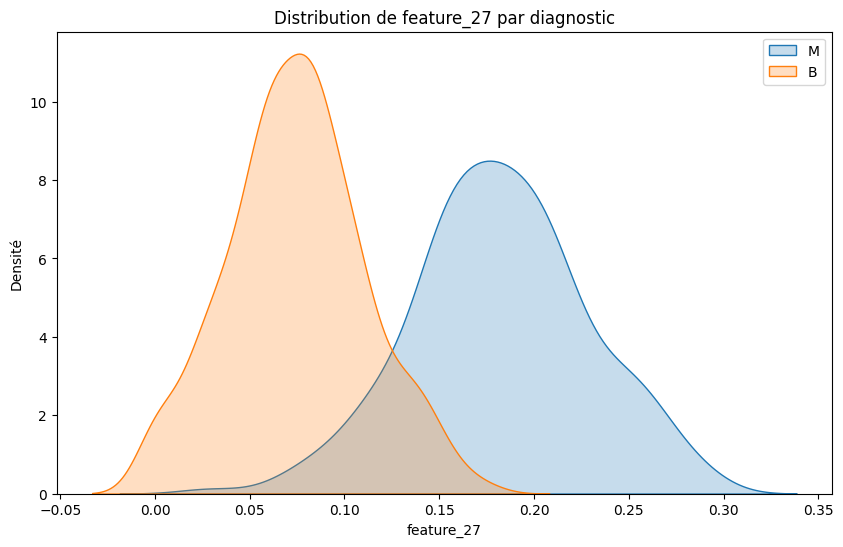

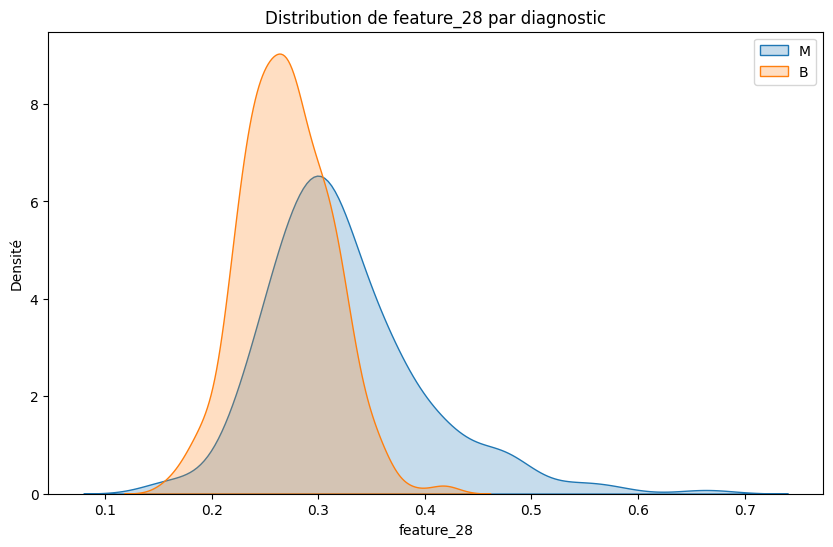

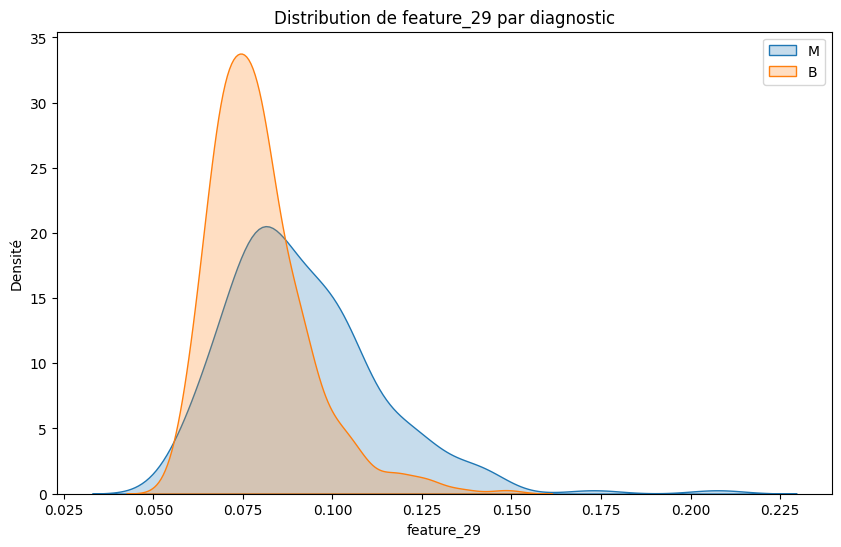

In [29]:
df_M = df[df['diagnosis'] == 'M']
df_B = df[df['diagnosis'] == 'B']
for col in df.select_dtypes(include=['float']):
    plt.figure(figsize=(10, 6))
    # Utiliser kdeplot au lieu de displot pour superposer les distributions sur le même graphique
    sns.kdeplot(df_M[col], label='M', fill=True)
    sns.kdeplot(df_B[col], label='B', fill=True)
    plt.title(f'Distribution de {col} par diagnostic')
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

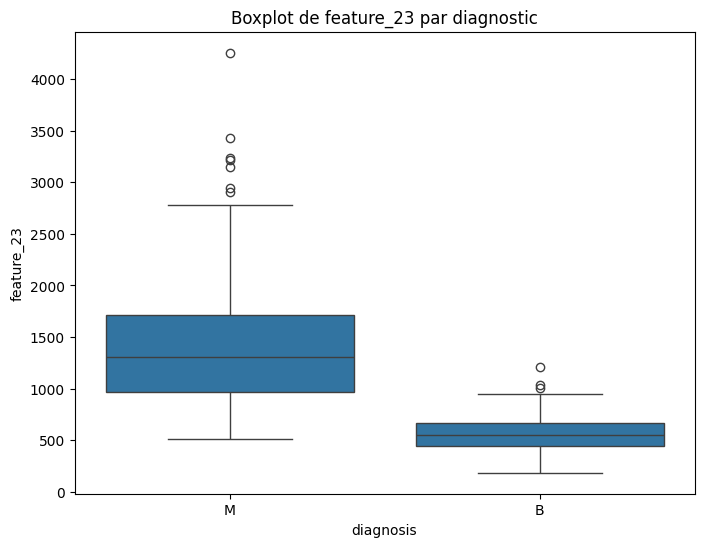

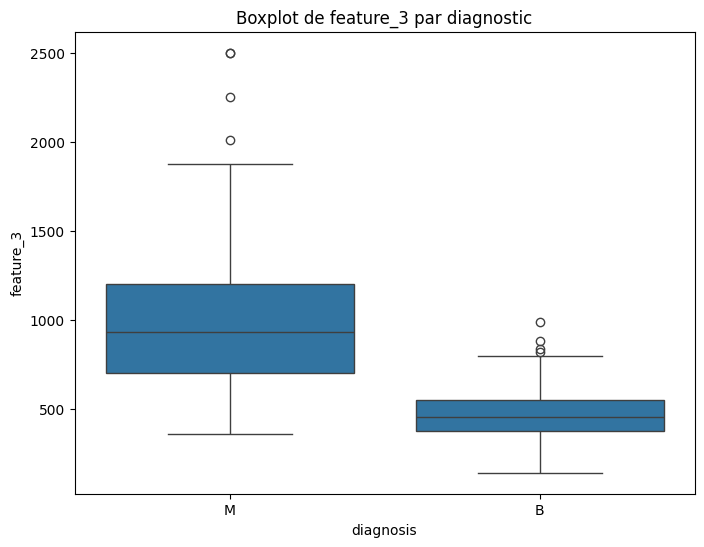

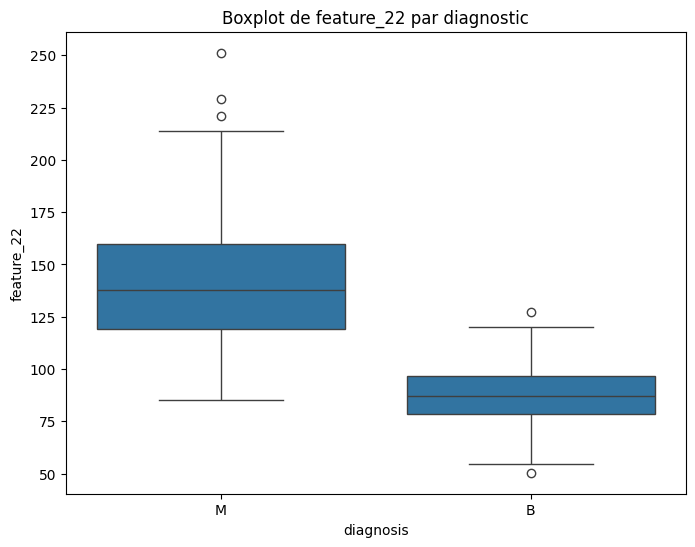

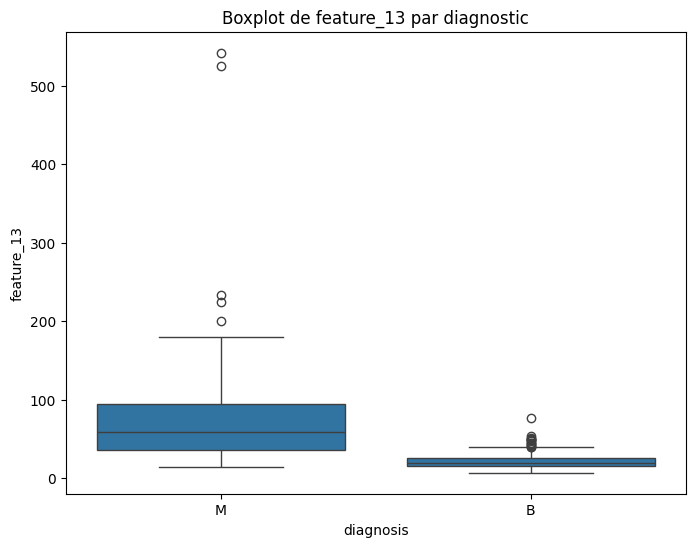

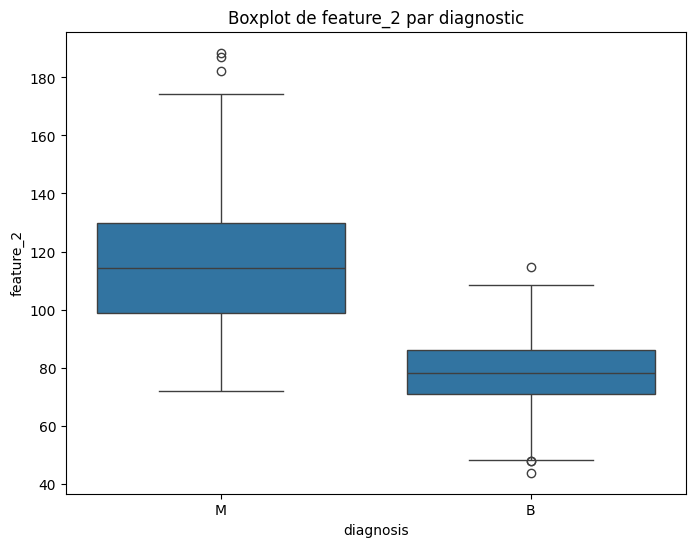

In [30]:
# Calculer les statistiques descriptives par groupe
stats_M = df_M.describe()
stats_B = df_B.describe()

# Comparer les moyennes
comparison = pd.DataFrame({
    'mean_M': stats_M.loc['mean'],
    'mean_B': stats_B.loc['mean'],
    'diff': stats_M.loc['mean'] - stats_B.loc['mean']
})
comparison = comparison.sort_values('diff', key=abs, ascending=False)
top_features = comparison.index[:5]  # Les 5 plus différenciantes
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Boxplot de {feature} par diagnostic')
    plt.show()

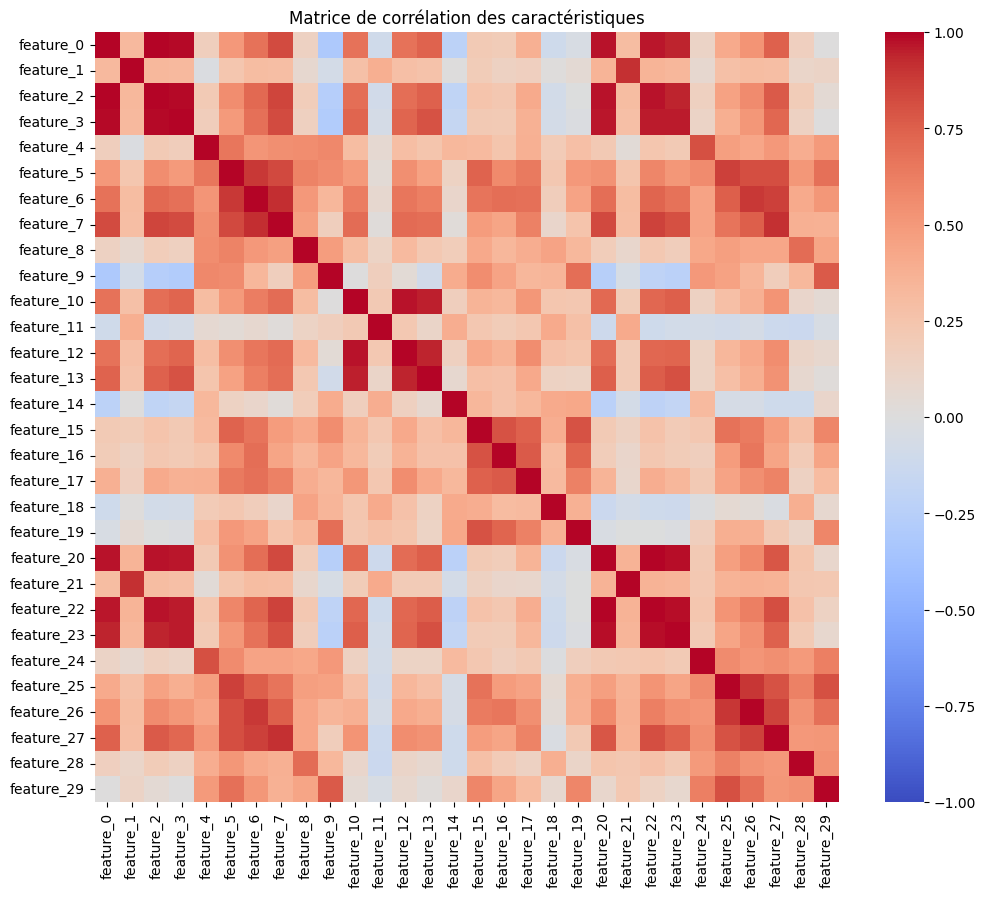

In [31]:
# Calculer la matrice de corrélation
corr_matrix = df.select_dtypes(include=['float']).corr()

# Visualiser avec une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des caractéristiques')
plt.show()

In [32]:
# Trouver les paires de caractéristiques fortement corrélées
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # Seuil de 0.8
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Afficher les paires
print("Paires de caractéristiques fortement corrélées:")
for feat1, feat2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{feat1} & {feat2}: {corr:.4f}")

Paires de caractéristiques fortement corrélées:
feature_2 & feature_0: 0.9979
feature_22 & feature_20: 0.9937
feature_3 & feature_0: 0.9874
feature_3 & feature_2: 0.9865
feature_23 & feature_20: 0.9840
feature_23 & feature_22: 0.9776
feature_12 & feature_10: 0.9728
feature_22 & feature_2: 0.9704
feature_20 & feature_0: 0.9695
feature_20 & feature_2: 0.9695
feature_22 & feature_0: 0.9651
feature_20 & feature_3: 0.9627
feature_23 & feature_3: 0.9592
feature_22 & feature_3: 0.9591
feature_13 & feature_10: 0.9518
feature_23 & feature_2: 0.9415
feature_23 & feature_0: 0.9411
feature_13 & feature_12: 0.9377
feature_7 & feature_6: 0.9214
feature_21 & feature_1: 0.9120
feature_27 & feature_7: 0.9102
feature_26 & feature_25: 0.8923
feature_26 & feature_6: 0.8841
feature_6 & feature_5: 0.8831
feature_25 & feature_5: 0.8658
feature_27 & feature_6: 0.8613
feature_22 & feature_7: 0.8559
feature_27 & feature_26: 0.8554
feature_7 & feature_2: 0.8510
feature_7 & feature_5: 0.8311
feature_20 & feature_

In [38]:
from scipy.stats import ttest_ind
df_B_balenced = df_B.sample(df_M.shape[0])
def t_test(col):
    alpha = 0.02
    stats, p = ttest_ind(df_B_balenced[col], df_M[col])
    if p < alpha:
        return 'H0 rejetée'
    else :
        return 0

In [39]:
for col in df.select_dtypes(include=['float']):
    print(f'{col :-<50} {t_test(col)}')

feature_0----------------------------------------- H0 rejetée
feature_1----------------------------------------- H0 rejetée
feature_2----------------------------------------- H0 rejetée
feature_3----------------------------------------- H0 rejetée
feature_4----------------------------------------- H0 rejetée
feature_5----------------------------------------- H0 rejetée
feature_6----------------------------------------- H0 rejetée
feature_7----------------------------------------- H0 rejetée
feature_8----------------------------------------- H0 rejetée
feature_9----------------------------------------- 0
feature_10---------------------------------------- H0 rejetée
feature_11---------------------------------------- 0
feature_12---------------------------------------- H0 rejetée
feature_13---------------------------------------- H0 rejetée
feature_14---------------------------------------- 0
feature_15---------------------------------------- H0 rejetée
feature_16-------------------------